# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [48]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(cities[0:10])

Number of cities in the list: 598
['talnakh', 'bang saphan', 'adamstown', 'guerrero negro', 'mount pearl', 'waitangi', 'badger', 'chicoana', 'kingston', 'klyuchi']


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [55]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
  
    
    #f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    #f"{url}appid={weather_api_key}&lat={lats}&lon={lngs}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | bang saphan
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | guerrero negro
Processing Record 5 of Set 1 | mount pearl
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | badger
Processing Record 8 of Set 1 | chicoana
Processing Record 9 of Set 1 | kingston
Processing Record 10 of Set 1 | klyuchi
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | krasnokholmskiy
Processing Record 15 of Set 1 | rio grande
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | puke
Processing Record 19 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | dudinka
Processing Record

Processing Record 37 of Set 4 | minas de marcona
Processing Record 38 of Set 4 | bahau
Processing Record 39 of Set 4 | hidalgo
Processing Record 40 of Set 4 | weno
Processing Record 41 of Set 4 | hermanus
Processing Record 42 of Set 4 | ahfir
Processing Record 43 of Set 4 | georgetown
Processing Record 44 of Set 4 | skovorodino
Processing Record 45 of Set 4 | shache
Processing Record 46 of Set 4 | lobito
Processing Record 47 of Set 4 | el calafate
Processing Record 48 of Set 4 | rosamond
Processing Record 49 of Set 4 | kerikeri
Processing Record 0 of Set 5 | le vauclin
Processing Record 1 of Set 5 | marsala
Processing Record 2 of Set 5 | costa teguise
City not found. Skipping...
Processing Record 3 of Set 5 | alice springs
Processing Record 4 of Set 5 | taman rajawali
City not found. Skipping...
Processing Record 5 of Set 5 | lakatoro
Processing Record 6 of Set 5 | brookings
Processing Record 7 of Set 5 | vila velha
Processing Record 8 of Set 5 | yenotayevka
Processing Record 9 of Set 

Processing Record 30 of Set 8 | igarka
Processing Record 31 of Set 8 | yamada
Processing Record 32 of Set 8 | sungai penuh
Processing Record 33 of Set 8 | tsiombe
Processing Record 34 of Set 8 | bilthra
Processing Record 35 of Set 8 | visby
Processing Record 36 of Set 8 | isna
Processing Record 37 of Set 8 | polyarnyy
Processing Record 38 of Set 8 | mutum biyu
Processing Record 39 of Set 8 | aldinga beach
Processing Record 40 of Set 8 | la toma
Processing Record 41 of Set 8 | ormara
Processing Record 42 of Set 8 | tchibanga
Processing Record 43 of Set 8 | kailua-kona
Processing Record 44 of Set 8 | nuuk
Processing Record 45 of Set 8 | high river
Processing Record 46 of Set 8 | badou
Processing Record 47 of Set 8 | margate
Processing Record 48 of Set 8 | cafayate
Processing Record 49 of Set 8 | concepcion
Processing Record 0 of Set 9 | birjand
Processing Record 1 of Set 9 | kerrville
Processing Record 2 of Set 9 | bourbonnais
Processing Record 3 of Set 9 | tucuma
Processing Record 4 of 

Processing Record 19 of Set 12 | nouadhibou
Processing Record 20 of Set 12 | pont rouge
Processing Record 21 of Set 12 | masallatah
Processing Record 22 of Set 12 | itaituba
Processing Record 23 of Set 12 | lerwick
Processing Record 24 of Set 12 | rexburg
Processing Record 25 of Set 12 | tudor vladimirescu
Processing Record 26 of Set 12 | samana
Processing Record 27 of Set 12 | al bardiyah
Processing Record 28 of Set 12 | ouahigouya
Processing Record 29 of Set 12 | kurlovo
Processing Record 30 of Set 12 | al bawiti
Processing Record 31 of Set 12 | coxim
Processing Record 32 of Set 12 | burhar
Processing Record 33 of Set 12 | vezirkopru
Processing Record 34 of Set 12 | chibuto
Processing Record 35 of Set 12 | illizi
Processing Record 36 of Set 12 | tenango de las flores
Processing Record 37 of Set 12 | leticia
Processing Record 38 of Set 12 | singkawang
Processing Record 39 of Set 12 | sarkand
Processing Record 40 of Set 12 | miri
Processing Record 41 of Set 12 | sibolga
Processing Reco

In [56]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()


City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [57]:
len(city_data)

567

In [58]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,-13.77,66,100,12.74,RU,1703026928
1,bang saphan,11.2126,99.5117,24.09,79,100,1.77,TH,1703026928
2,adamstown,-25.0660,-130.1015,23.03,78,99,7.21,PN,1703026928
3,guerrero negro,27.9769,-114.0611,21.20,53,83,5.89,MX,1703026928
4,mount pearl,47.5166,-52.7813,12.69,89,75,9.26,CA,1703026929


In [60]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [61]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,-13.77,66,100,12.74,RU,1703026928
1,bang saphan,11.2126,99.5117,24.09,79,100,1.77,TH,1703026928
2,adamstown,-25.0660,-130.1015,23.03,78,99,7.21,PN,1703026928
3,guerrero negro,27.9769,-114.0611,21.20,53,83,5.89,MX,1703026928
4,mount pearl,47.5166,-52.7813,12.69,89,75,9.26,CA,1703026929


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

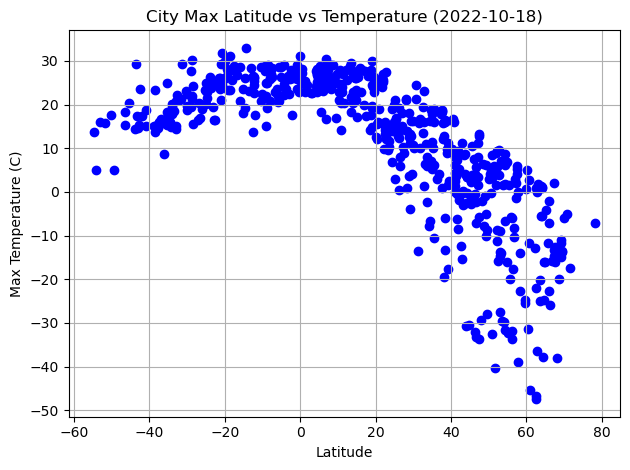

In [62]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o', facecolor = 'blue')

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

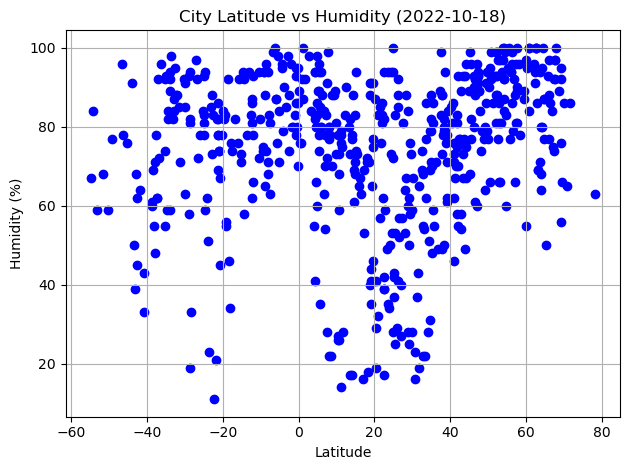

In [63]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o', facecolor = 'blue')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

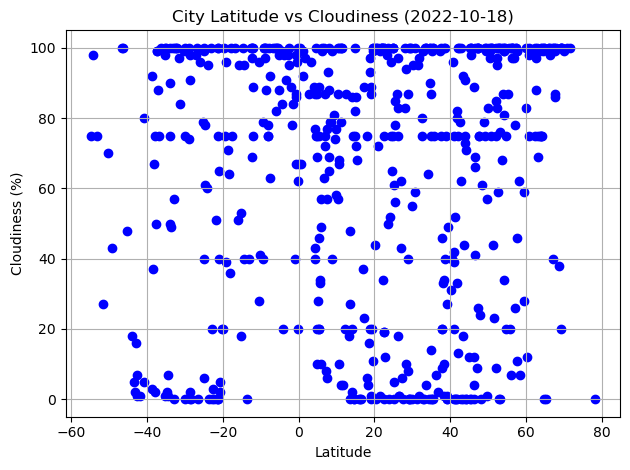

In [64]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o', facecolor = 'blue')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

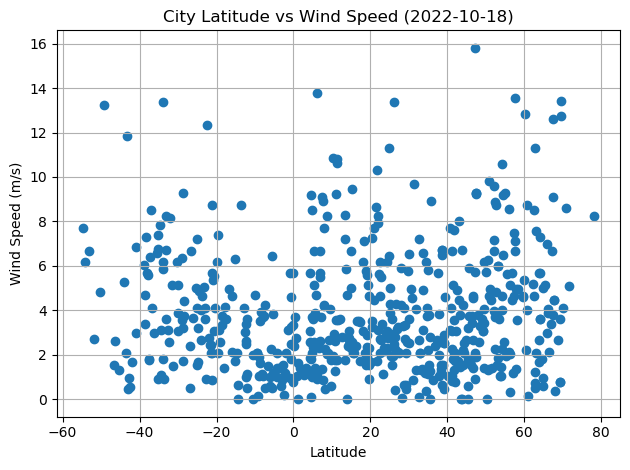

In [65]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,-13.77,66,100,12.74,RU,1703026928
1,bang saphan,11.2126,99.5117,24.09,79,100,1.77,TH,1703026928
3,guerrero negro,27.9769,-114.0611,21.20,53,83,5.89,MX,1703026928
4,mount pearl,47.5166,-52.7813,12.69,89,75,9.26,CA,1703026929
6,badger,64.8000,-147.5333,-16.12,87,100,0.60,US,1703026929


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,23.03,78,99,7.21,PN,1703026928
5,waitangi,-43.9535,-176.5597,14.41,91,18,5.29,NZ,1703026929
7,chicoana,-25.1009,-65.5331,20.03,93,100,1.52,AR,1703026929
10,avarua,-21.2078,-159.7750,26.03,69,75,5.66,CK,1703026929
11,west island,-12.1568,96.8225,25.99,78,75,3.60,CC,1703026930


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8092112329010317


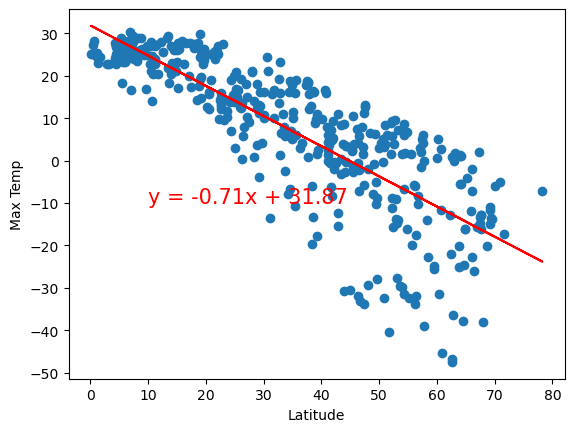

In [69]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
                                                      
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')                                                      
                                                      
                                                      

The r-value is 0.6338376255828768


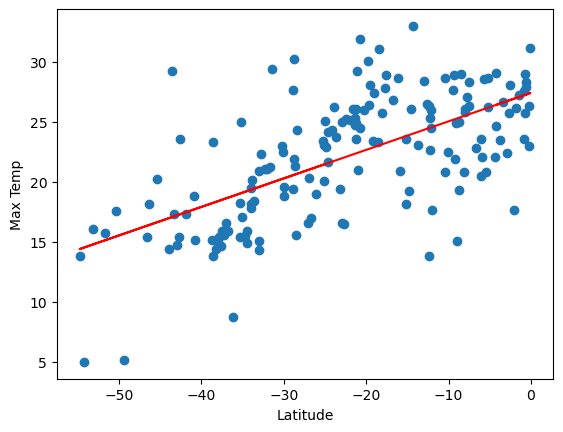

In [70]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-60,35),fontsize=14,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** There is a strong correlation between temperature and latitude. The northern is a negative correlation while the southern is a positive. As you increase in latitude the max temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.3111007667842607


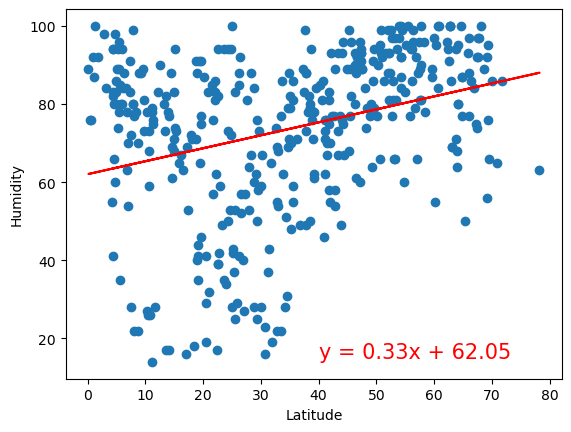

In [71]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

The r-value is 0.287871649802577


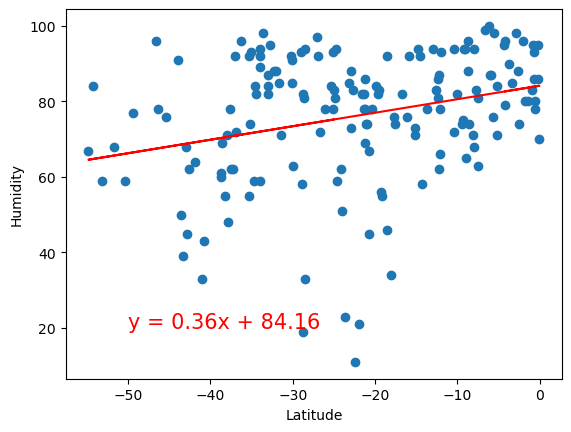

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** The relationship is slightly positive as the hummidity increases as you get closer to the equator at 0. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.12983674068548126


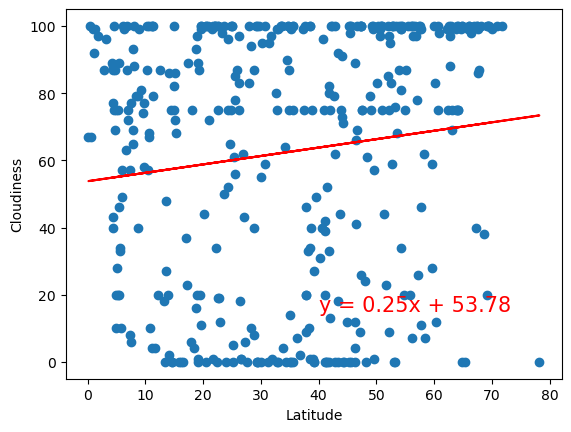

In [73]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is 0.27029112719463555


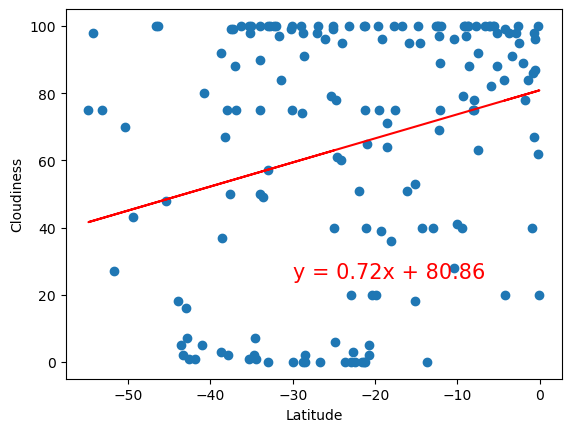

In [74]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')


**Discussion about the linear relationship:** Based on the graphs there does not seem to be a correlation or at best a weak correlation between latitude and cloudinesss. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.12952646150641078


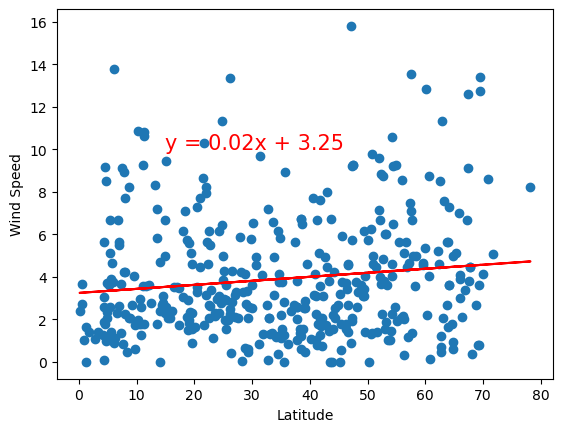

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.3772700265382335


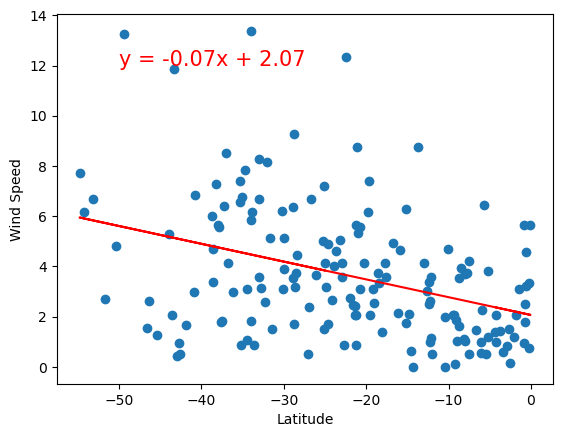

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** There doesn't seem to be much relationship betweek Wind Speed and Latitude